In [1]:
cd ..

C:\Users\simon\OneDrive\Desktop\team5\team5


In [2]:
import pandas as pd
datapath = 'data/static_data/clean_data/clean_train.csv'

In [5]:
df_train = pd.read_csv(datapath, index_col=0)

# EDA on tweets

### Distribution of sentiments in tweets
- Most of the tweets are neutral tweets
- The average sentiment of the tweets is 0.058 (mostly neutral, slightly on the positive side)

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

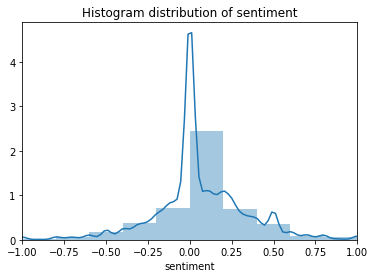

In [12]:
sns.distplot(df_train.sentiment, bins=10)
plt.xlim((-1,1))
plt.title('Histogram distribution of sentiment')
plt.show()

In [9]:
df_train.sentiment.describe()

count    137165.000000
mean          0.058303
std           0.274492
min          -1.000000
25%          -0.033333
50%           0.000000
75%           0.200000
max           1.000000
Name: sentiment, dtype: float64

### Word cloud for positive and negative tweets

In [14]:
# Separate the train dataset into positive and negative sentiment
threshold = 0.3
neg_df = df_train.loc[df_train.sentiment < -threshold, :]
pos_df = df_train.loc[df_train.sentiment > threshold, :]

In [15]:
pos_corpus = pos_df.tweet.values
neg_corpus = neg_df.tweet.values
total_corpus = df_train.tweet.values

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(total_corpus)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [17]:
import numpy as np
pos_vec = vectorizer.transform(pos_corpus)
neg_vec = vectorizer.transform(neg_corpus)
diff_vec = np.sum(pos_vec, axis=0) - np.sum(neg_vec, axis=0)

In [39]:
diff_df = pd.DataFrame(diff_vec, columns = vectorizer.get_feature_names()).T

In [57]:
threshold = 50
pos_wc = diff_df.loc[(diff_df[0] > threshold)]
neg_wc = diff_df.loc[(diff_df[0] < -threshold)]
print('Number of words in pos_wc: ' + str(len(pos_wc)))
print('Number of words in neg_wc: ' + str(len(neg_wc)))

Number of words in pos_wc: 503
Number of words in neg_wc: 58


In [58]:
pos_tokens = []
for i,feq in enumerate(pos_wc[0]):
    for t in range(feq):
        pos_tokens.append(pos_wc.index[i])
pos_tokens = ' '.join(pos_tokens)

neg_tokens = []
for i,feq in enumerate(neg_wc[0]):
    feq = -feq
    for t in range(feq):
        neg_tokens.append(neg_wc.index[i])
neg_tokens = ' '.join(neg_tokens)

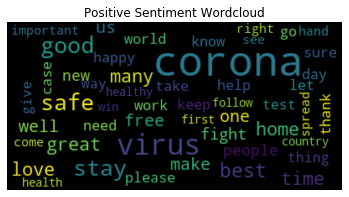

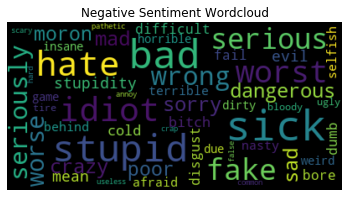

In [113]:
from wordcloud import WordCloud, ImageColorGenerator

pos_wordcloud = WordCloud(max_font_size=50, max_words=50, collocations=False).generate(pos_tokens)
neg_wordcloud = WordCloud(max_font_size=50, max_words=50, collocations=False).generate(neg_tokens)

plt.imshow(pos_wordcloud, interpolation='bilinear')
plt.title('Positive Sentiment Wordcloud')
plt.axis("off")
plt.show()

plt.imshow(neg_wordcloud, interpolation='bilinear')
plt.title('Negative Sentiment Wordcloud')
plt.axis("off")
plt.show()

### Wordcloud for common words between negative and positive tweets

In [90]:
pos_count = np.sum(pos_vec, axis=0)
neg_count = np.sum(neg_vec, axis=0)

In [91]:
common_vec = np.sqrt(np.multiply(pos_count, neg_count))

In [93]:
common_df = pd.DataFrame(common_vec, columns = vectorizer.get_feature_names()).T

In [107]:
threshold = 200
common_wc = common_df.loc[(common_df[0] > threshold)]

print('Number of words in common_wc: ' + str(len(common_wc)))

Number of words in common_wc: 106


In [108]:
common_tokens = []
for i,feq in enumerate(common_wc[0]):
    for t in range(int(feq)):
        common_tokens.append(common_wc.index[i])
common_tokens = ' '.join(common_tokens)

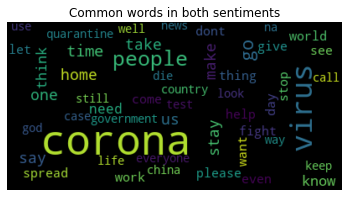

In [109]:
common_wordcloud = WordCloud(max_font_size=50, max_words=50, collocations=False).generate(common_tokens)

plt.imshow(common_wordcloud, interpolation='bilinear')
plt.title('Common words in both sentiments')
plt.axis("off")
plt.show()

In [101]:
pos_df = pd.DataFrame(pos_count, columns = vectorizer.get_feature_names()).T
neg_df = pd.DataFrame(neg_count, columns = vectorizer.get_feature_names()).T

In [114]:
# Corona and virus appear in both 'common' and 'positive' cloud
# because these words appear in high frequency in both sentiment
# but it appeared more in positive tweet.

word = 'corona'

print('common_df: ' + str(common_df.loc[word].values))
print('pos_df: ' + str(pos_df.loc[word].values))
print('neg_df: ' + str(neg_df.loc[word].values))
print('diff_df: ' + str(diff_df.loc[word].values))

common_df: [11372.27281593]
pos_df: [16553]
neg_df: [7813]
diff_df: [8740]


### Length of tweets and sentiment

In [133]:
df_train['tweet_len'] = df_train.tweet.apply(len) 

In [134]:
threshold = 0.3
df_train['class'] = 'neutral'
df_train.loc[df_train.sentiment > threshold ,['class']] = 'pos'
df_train.loc[df_train.sentiment < -threshold ,['class']] = 'neg'

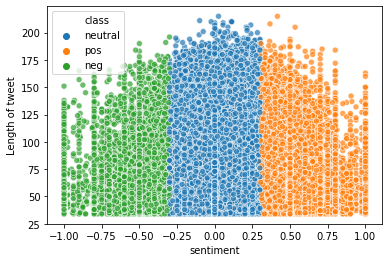

In [141]:
sns.scatterplot(data=df_train, x='sentiment', y='tweet_len', alpha=0.7, hue='class')
plt.ylabel('Length of tweet')
plt.show()

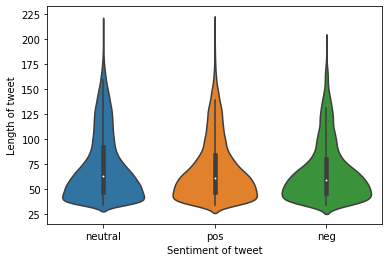

In [142]:
sns.violinplot(data=df_train, x='class', y='tweet_len')
plt.ylabel('Length of tweet')
plt.xlabel('Sentiment of tweet')
plt.show()

In [148]:
import re

def find_hashtag(entry):
    hashtag_pattern = r'#.+?\s'
    output = re.findall(hashtag_pattern, entry)
    if len(output) == 0:
        output = None
    return output

df_train['hashtag'] = df_train.tweet.apply(find_hashtag)

In [149]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137165 entries, 68740 to 53264
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   created_date  137165 non-null  object 
 1   tweet         137165 non-null  object 
 2   tweet_id      137165 non-null  int64  
 3   sentiment     137165 non-null  float64
 4   tweet_len     137165 non-null  int64  
 5   class         137165 non-null  object 
 6   hashtag       0 non-null       object 
dtypes: float64(1), int64(2), object(4)
memory usage: 13.4+ MB


### Vocabulary analysis

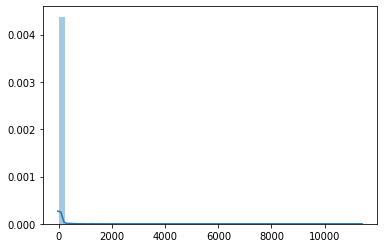

In [160]:
sns.distplot(common_df)
plt.show()

In [161]:
common_df.describe()

,0
count,19705.000000
mean,7.109019
std,96.895095
min,0.000000
25%,0.000000
50%,0.000000
75%,1.414214
max,11372.272816


In [173]:
unique_words = common_df.loc[(common_df[0] == 0)]
print('Number of words unique to the respective sentiment: ' + str(len(unique_words)))

uni_words = list(unique_words.index)

Number of words unique to the respective sentiment: 13881


In [176]:
import pickle
with open("data/unique_word.txt", "wb") as fp:
    pickle.dump(uni_words, fp)